In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(None)
from tqdm import tqdm
%matplotlib inline

In [3]:
import cv2
import os

In [4]:
path = 'CATS_DOGS/train/CAT/'

In [5]:
cat_train_list = os.listdir(path)

In [6]:
X = np.zeros((int(len(cat_train_list)),60*60*3+1))

In [7]:
i=0
for i in tqdm(range(int(len(cat_train_list)))):
    pic = cv2.imread(path+cat_train_list[i])
    pic = cv2.resize(pic,(60,60))
    cat_train_pic = pic.reshape(pic.shape[0]*pic.shape[1]*3,1).T
    cat_train_pic = cat_train_pic/225
    X[i,:-1] = cat_train_pic
    X[i,-1] = 1

100%|██████████| 9310/9310 [02:36<00:00, 59.43it/s]


In [8]:
X_cat = X[:,:-1]

In [9]:
path = 'CATS_DOGS/train/DOG/'

In [10]:
dog_train_list = os.listdir(path)

In [11]:
X1 = np.zeros( (int(len(dog_train_list)),60*60*3+1))

In [12]:
i=0
for i in tqdm(range(int(len(dog_train_list)))):
    pic = cv2.imread(path+dog_train_list[i])
    pic = cv2.resize(pic,(60,60))
    dog_train_pic = pic.reshape(pic.shape[0]*pic.shape[1]*3,1).T
    dog_train_pic = dog_train_pic/225
    X1[i,:-1] = dog_train_pic
    X1[i,-1] = 0

100%|██████████| 9282/9282 [02:32<00:00, 60.93it/s]


In [13]:
X_dog = X1[:,:-1]

In [14]:
x = np.zeros((X.shape[0]+X1.shape[0],X.shape[1]))

In [15]:
x[0:9310,:] = X

In [16]:
x[9310:,:] = X1

In [17]:
np.random.shuffle(x)

In [18]:
X = x[:,:-1]

In [19]:
Y = x[:,-1]

In [20]:
X.shape

(18592, 10800)

In [21]:
Y = Y.reshape((X.shape[0],1))

In [22]:
Y.shape

(18592, 1)

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(2, activation="softmax"))

In [24]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [27]:
history = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

W0813 23:08:51.180268 139741247256384 deprecation.py:323] From /home/gp/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 13014 samples, validate on 5578 samples
Epoch 1/50
13014/13014 [==============================] - 6s 492us/sample - loss: 0.6884 - accuracy: 0.5654 - val_loss: 0.6592 - val_accuracy: 0.6146
Epoch 2/50
13014/13014 [==============================] - 4s 342us/sample - loss: 0.6584 - accuracy: 0.6138 - val_loss: 0.6826 - val_accuracy: 0.5376
Epoch 3/50
13014/13014 [==============================] - 4s 344us/sample - loss: 0.6470 - accuracy: 0.6204 - val_loss: 0.6431 - val_accuracy: 0.6291
Epoch 4/50
13014/13014 [==============================] - 4s 340us/sample - loss: 0.6368 - accuracy: 0.6355 - val_loss: 0.6492 - val_accuracy: 0.6246
Epoch 5/50
13014/13014 [==============================] - 4s 340us/sample - loss: 0.6300 - accuracy: 0.6388 - val_loss: 0.6489 - val_accuracy: 0.6180
Epoch 6/50
13014/13014 [==============================] - 5s 389us/sample - loss: 0.6253 - accuracy: 0.6448 - val_loss: 0.6295 - val_accuracy: 0.6425
Epoch 7/50
13014/13014 [===========================

In [28]:
import pandas as pd

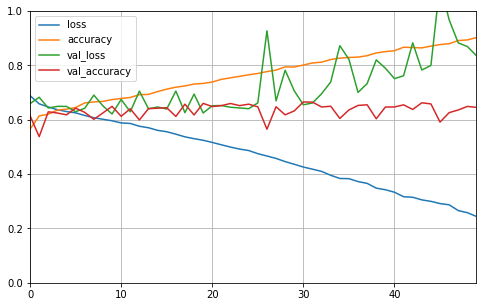

In [29]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [33]:
X[0,:].shape

(10800,)

In [34]:
img = np.reshape(X[0,:],(60,60,3))

In [36]:
import matplotlib.pyplot as plt

W0813 23:15:25.282957 139741247256384 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


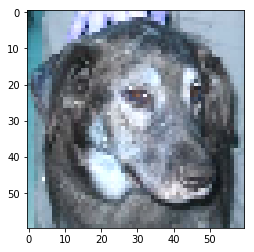

In [37]:
plt.imshow(img)

In [42]:
ypred = model.predict_classes(X[0:1,:])

In [43]:
ypred

array([0])

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(classification_report(Y,model.predict_classes(X)))

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      9282
         1.0       0.84      0.86      0.85      9310

   micro avg       0.84      0.84      0.84     18592
   macro avg       0.85      0.84      0.84     18592
weighted avg       0.85      0.84      0.84     18592



In [47]:
print(confusion_matrix(Y,model.predict_classes(X)))

[[7715 1567]
 [1317 7993]]
